In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

In [3]:
diabetes = pd.read_csv('/Users/spencerfogelman/Downloads/diabetes-training.csv')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# What is the most represented race?


Caucasian          75303
AfricanAmerican    19073
?                   2234
Hispanic            2003
Other               1465
Asian                624
Name: race, dtype: int64


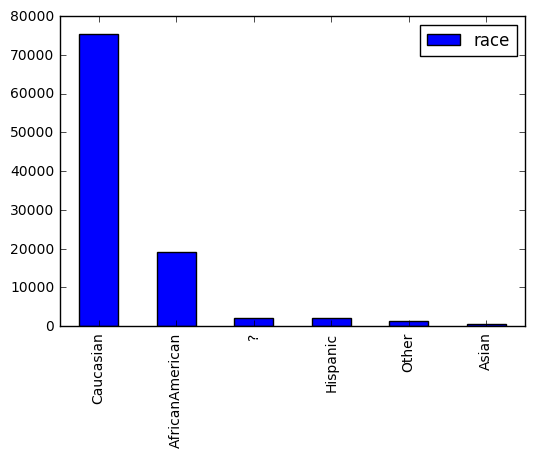

In [27]:
print(diabetes.race.value_counts())
race = pd.DataFrame(diabetes.race.value_counts())
race.plot(kind='bar')
plt.show()

* Caucasian is the most represented race in the diabetes study.

# How is race and time in hospital related?
        Unwanted data having a question mark was removed.

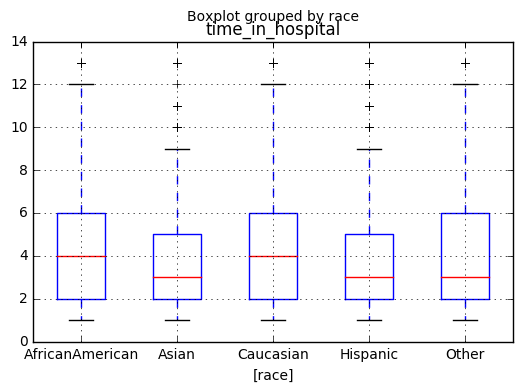

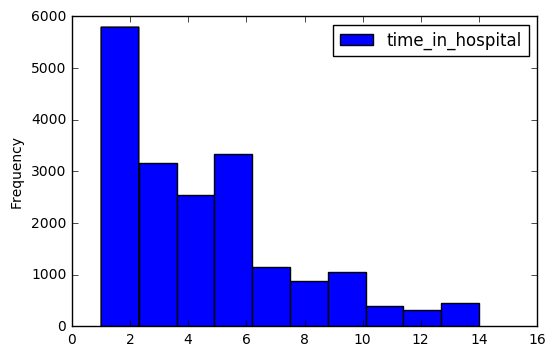

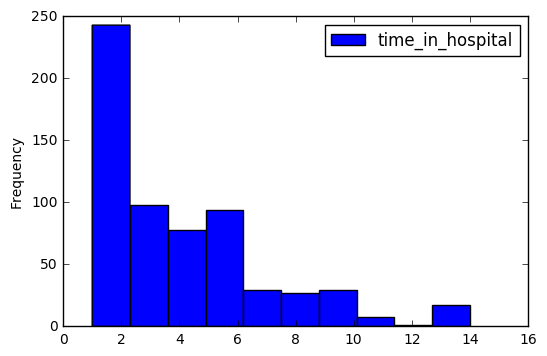

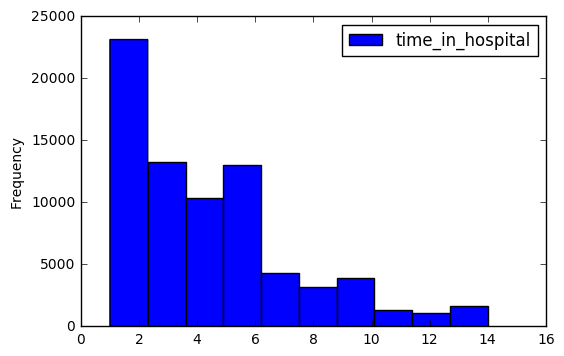

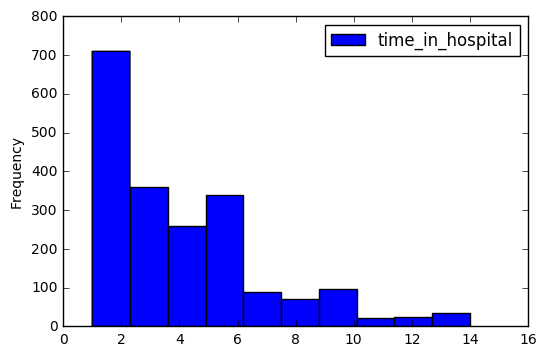

In [30]:

diabetes.loc[:, ['time_in_hospital', 'race']].loc[diabetes.race != '?'].boxplot(by='race')
diabetes[diabetes.race == 'AfricanAmerican'][['time_in_hospital']].plot(kind='hist')
diabetes[diabetes.race == 'Asian'][['time_in_hospital']].plot(kind='hist')
diabetes[diabetes.race == 'Caucasian'][['time_in_hospital']].plot(kind='hist')
diabetes[diabetes.race == 'Hispanic'][['time_in_hospital']].plot(kind='hist')
plt.show()

* It seems that Caucasians and African Americans spend more time in the hospital than Asians and Hispanics.
* Based on the histograms and boxplots we can see that all the data is right skewed.
# APPLY TRANSFORMATION LATER

In [33]:
african =diabetes.loc[diabetes.race == 'AfricanAmerican']['time_in_hospital'].median()
print('african: ' + str(african))
asian =diabetes.loc[diabetes.race == 'Asian']['time_in_hospital'].median()
print('asian: ' + str(asian))
caucasian =diabetes.loc[diabetes.race == 'Caucasian']['time_in_hospital'].median()
print('Caucasian: ' + str(caucasian))
hispanic =diabetes.loc[diabetes.race == 'Hispanic']['time_in_hospital'].median()
print('Hispanic: ' + str(hispanic))

african: 4.0
asian: 3.0
Caucasian: 4.0
Hispanic: 3.0


* The medians verify that Caucasians and African Americans spend more time in the hospital than Asians and Hispanics.


In [7]:
african =diabetes.loc[diabetes.race == 'AfricanAmerican']['time_in_hospital']
asian =diabetes.loc[diabetes.race == 'Asian']['time_in_hospital']
caucasian =diabetes.loc[diabetes.race == 'Caucasian']['time_in_hospital']
hispanic =diabetes.loc[diabetes.race == 'Hispanic']['time_in_hospital']
print(ttest_ind(african, caucasian, equal_var=False))
print(ttest_ind(caucasian, hispanic, equal_var=False))
print(ttest_ind(caucasian, asian, equal_var=False))
print(ttest_ind(asian, hispanic, equal_var=False))



Ttest_indResult(statistic=4.808810090213723, pvalue=1.5259304518793745e-06)
Ttest_indResult(statistic=5.1532053605993511, pvalue=2.7976777696377368e-07)
Ttest_indResult(statistic=3.1689840801163869, pvalue=0.0016033875256518198)
Ttest_indResult(statistic=-0.34389636150667102, pvalue=0.73099626321537547)


* Based on the t- tests, Africans and Caucasians are actually not similiar which is surprising.
* Hispanics and Asians are in fact similar.
* Possible explanation: Asians and Hispanics may be healthier than African Americans and Caucaians. Or, Asians and Hispanics may not have access to as good healthcare.

In [ ]:
diabetes.loc[['num_lab_procedures', 'race']][diabetes.race != '?'].boxplot(by='race')
plt.show()

* It is interesting that there are so many outliers for just African Americans and Caucasians.

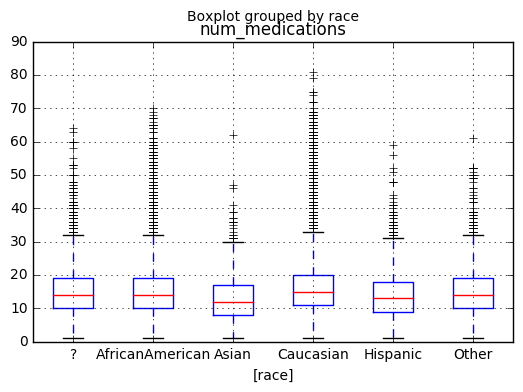

In [9]:
diabetes.loc[:, ['num_medications', 'race']].boxplot(by='race')
plt.show()

In [10]:
diabetes.gender.value_counts()

Female             54141
Male               46558
Unknown/Invalid        3
Name: gender, dtype: int64

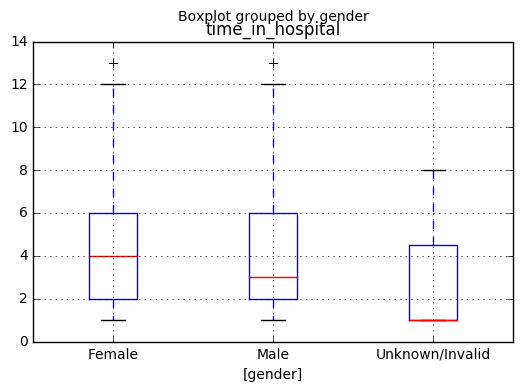

Ttest_indResult(statistic=-9.5233917697820072, pvalue=1.7123362537799364e-21)


In [11]:
diabetes.loc[:, ['time_in_hospital', 'gender']].boxplot(by='gender')
plt.show()
male = diabetes.loc[diabetes.gender == 'Male']['time_in_hospital']
female = diabetes.loc[diabetes.gender == 'Female']['time_in_hospital']
print(ttest_ind(male, female, equal_var=False))


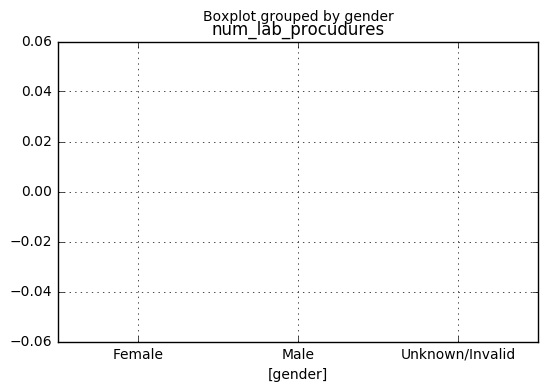

In [12]:
diabetes.loc[:, ['num_lab_procudures', 'gender']].boxplot(by='gender')
plt.show()

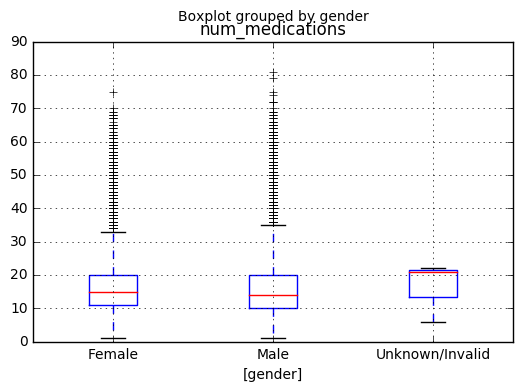

Ttest_indResult(statistic=-6.975834412799939, pvalue=3.060138381135072e-12)


In [13]:
diabetes.loc[:, ['num_medications', 'gender']].boxplot(by='gender')
plt.show()
male = diabetes.loc[diabetes.gender == 'Male']['num_medications']
female = diabetes.loc[diabetes.gender == 'Female']['num_medications']
print(ttest_ind(male, female, equal_var=False))

In [14]:
diabetes.age.value_counts()

[70-80)     25811
[60-70)     22257
[50-60)     17084
[80-90)     16977
[40-50)      9597
[30-40)      3734
[90-100)     2757
[20-30)      1640
[10-20)       685
[0-10)        160
Name: age, dtype: int64

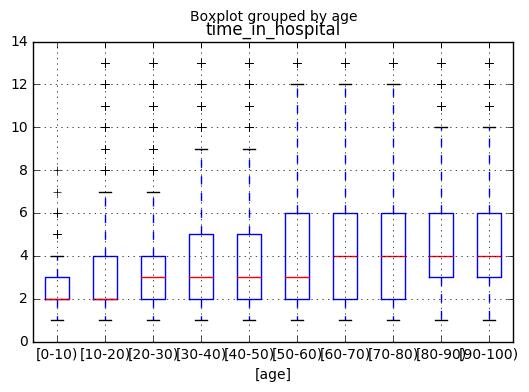

In [15]:
diabetes[['time_in_hospital', 'age']].boxplot(by='age')
plt.show()

In [16]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
diabetes.admission_type_id.value_counts()

1.0    53328
3.0    18688
2.0    18303
6.0     5265
5.0     4774
8.0      315
7.0       19
4.0       10
Name: admission_type_id, dtype: int64